In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, chi2, t, f
import sys
import math

# Хи-квадрат

Пусть случайная величина $X$ имеет распределение  
$\chi_{k}^2$ с 5-ю степенями свободы,
то есть $X \sim \chi_{k}^2$.

In [3]:
df = 5
chi2.cdf(x = 6, df=df)

0.6937810815867212

In [4]:
chi2.pdf(x=6, df=df)  #плотность в точке 6

0.09730434665928296

In [5]:
print(chi2.mean(df=df))
print(chi2.var(df=df))
print(chi2.median(df=df))
print(chi2.moment(n=5 , df=df))

5.0
10.0
4.351460191095526
45044.99995160286


In [6]:
chi2.ppf(0.95,df=df)   #квантиль уровня 0,95

11.070497693516351

In [7]:
с = chi2.rvs(size = 1000, df = 5)  

f(0.7) = F'(0.7) =  0.054882363062039155       -функция плотности в точке 0.7
E(X) =  5.0                                   -математическое ожидание X
Var(X) =  10.0                                 -дисперсия X
Median(X) =  4.351460191095526                -медиана X
E(X ^ 5) =  45044.99995160286                 -пятый начальный момент X
q : {P(X < q) = 0.6} =  5.1318670744018196     -квантиль уровня 0.6 с.в. X 


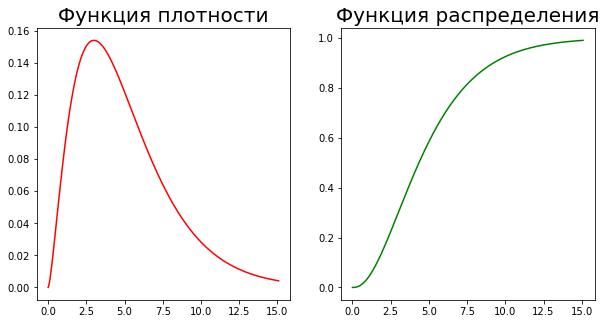

In [8]:
x= np.linspace(0, chi2.ppf(0.99, df=df), 1000)
f_x = chi2.pdf(x, df= df)
F_x = chi2.cdf(x, df= df)

fig, axes = plt.subplots(nrows= 1, ncols =2)

fig.set_size_inches(10,5)

axes[0].plot(x,f_x,'r',label='Функция плотности')
axes[0].set_title('Функция плотности', fontsize= 20)
axes[1].plot(x,F_x,'g',label='CDF')
axes[1].set_title('Функция распределения', fontsize= 20)



print('f(0.7) = F\'(0.7) = ', chi2.pdf(0.7, df = df), '      -функция плотности в точке 0.7'  )  
print('E(X) = ', chi2.mean(df = df)     ,  '                                  -математическое ожидание X')
print('Var(X) = ', chi2.var(df = df)         ,  '                                -дисперсия X')
print('Median(X) = ', chi2.ppf(0.5, df = df)       ,'               -медиана X')
print('E(X ^ 5) = ', chi2.moment(n = 5, df = df) ,'                -пятый начальный момент X')
print( 'q : {P(X < q) = 0.6} = ',  chi2.ppf(q = 0.6, df = df)  ,     '    -квантиль уровня 0.6 с.в. X ')





plt.show()

# Распределение Стьюдента

Пусть случайная величина $X$ имеет распределение  
стьюдента с $5$-ю степенями свободы,
то есть $X \sim t_5$.

In [9]:
df= 5
t.cdf(0.7, df=df)

0.7424255258425918

f(0.7) = F'(0.7) =  0.2867654575766978       -функция плотности в точке 0.7
E(X) =  0.0                                  -математическое ожидание X
Var(X) =  1.6666666666666667                 -дисперсия X
Median(X) =  6.976003623003317e-17           -медиана X
E(X ^ 5) =  -5.22233878509436e-13          -пятый начальный момент X
q : {P(X < q) = 0.6} =  0.2671808657039658  -квантиль уровня 0.6 с.в. X 


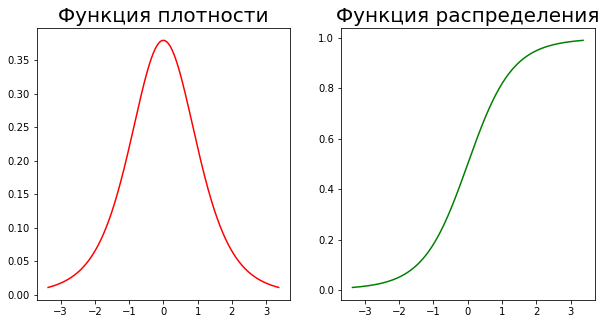

In [10]:
x= np.linspace(  t.ppf(0.01, df=df), t.ppf(0.99, df=df), 1000)
f_x = t.pdf(x, df= df)
F_x = t.cdf(x, df= df)

fig, axes = plt.subplots(nrows=1 , ncols=2)
fig.set_size_inches(10,5)

axes[0].plot(x,f_x,color = 'r',label='Функция плотности')
axes[0].set_title('Функция плотности', fontsize= 20)
axes[1].plot(x,F_x,color = 'g',label='CDF')
axes[1].set_title('Функция распределения', fontsize= 20)


print('f(0.7) = F\'(0.7) = ', t.pdf(0.7, df = df), '      -функция плотности в точке 0.7'  )  
print('E(X) = ', t.mean(df = df)     ,  '                                 -математическое ожидание X')
print('Var(X) = ', t.var(df = df)         ,  '                -дисперсия X')
print('Median(X) = ', t.ppf(0.5, df = df)       ,'          -медиана X')
print('E(X ^ 5) = ', t.moment(n = 5, df = df) ,'         -пятый начальный момент X')
print( 'q : {P(X < q) = 0.6} = ',  t.ppf(q = 0.6, df = df)  ,     ' -квантиль уровня 0.6 с.в. X ')

plt.show()

Стремление к нормальному распределению при росте числа степеней свободы

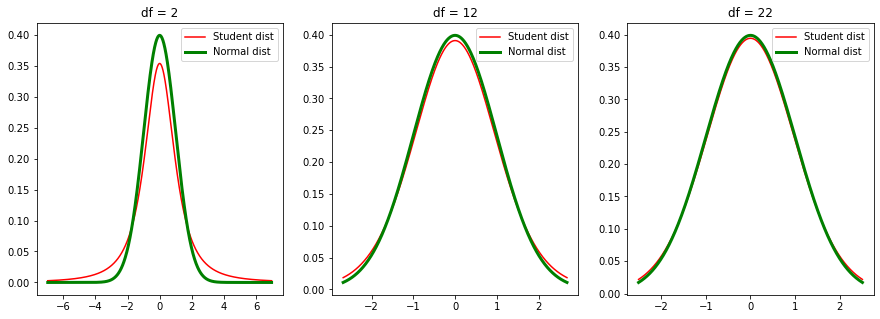

In [11]:
df= 5
x= np.linspace(  t.ppf(0.01, df=df), t.ppf(0.99, df=df), 1000)
f_x = t.pdf(x, df= df)
F_x = t.cdf(x, df= df)

fig, axes = plt.subplots(nrows=1 , ncols=3)
fig.set_size_inches(15,5)


df= 2
for ax in axes:
    x= np.linspace(  t.ppf(0.01, df=df), t.ppf(0.99, df=df), 1000)
    f_x = t.pdf(x, df= df)
    f_norm = norm.pdf(x, 0, 1)
    ax.plot(x,f_x, color = 'r', label='Student dist' )
    ax.plot(x, f_norm, color = 'g', linewidth =3 , label='Normal dist' )
    ax.set_title('df = {}'.format( df))
    ax.legend(loc = 'upper right')
    df+=10

plt.show()

# Распределение Фишера


In [12]:
# Пусть случайная величина X имеет распределение
# стьюдента с 5-ю и 10-ю степенями свободы,
# то есть X~F(5, 10).

In [13]:
df1= 5
df2= 10
f.cdf(0.7,dfn = df1, dfd = df2)

x= np.linspace(  0, f.ppf(0.99, dfn=df1, dfd= df2), 1000)
f_x = f.pdf(x, dfn=df1, dfd= df2)
F_x = f.cdf(x, dfn=df1, dfd= df2)


f(0.7) = F'(0.7) =  0.63952006988131       -функция плотности в точке 0.7
E(X) =  1.25                                  -математическое ожидание X
Var(X) =  1.3541666666666667                 -дисперсия X
Median(X) =  0.9319331608510479           -медиана X


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1826: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]


E(X ^ 5) =  9747.338418087109          -пятый начальный момент X
q : {P(X < q) = 0.6} =  1.1411892534544315  -квантиль уровня 0.6 с.в. X 


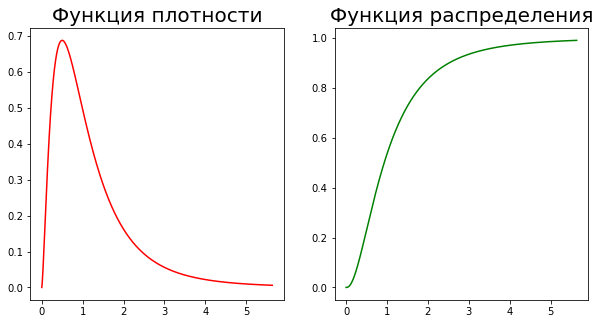

In [14]:
fig, axes = plt.subplots(nrows=1 , ncols=2)

fig.set_size_inches(10,5)

axes[0].plot(x,f_x,color = 'r',label='Функция плотности')
axes[0].set_title('Функция плотности', fontsize= 20)
axes[1].plot(x,F_x,color = 'g',label='CDF')
axes[1].set_title('Функция распределения', fontsize= 20)


print('f(0.7) = F\'(0.7) = ', f.pdf(0.7,dfn = df1, dfd = df2), '      -функция плотности в точке 0.7'  )  
print('E(X) = ', f.mean(dfn = df1, dfd = df2)     ,  '                                 -математическое ожидание X')
print('Var(X) = ', f.var(dfn = df1, dfd = df2)         ,  '                -дисперсия X')
print('Median(X) = ', f.ppf(0.5, dfn = df1, dfd = df2)       ,'          -медиана X')
print('E(X ^ 5) = ', f.moment(n = 5, dfn = df1, dfd = df2) ,'         -пятый начальный момент X')
print( 'q : {P(X < q) = 0.6} = ',  f.ppf(q = 0.6, dfn = df1, dfd = df2)  ,     ' -квантиль уровня 0.6 с.в. X ')

plt.show()


Произведение соответствующих квантилей всегда  
будет равняться единице

In [15]:
alpha = 0.7 
f.ppf(q= 1 - alpha, dfn = df1, dfd = df2)    * \
f.ppf(q= alpha, dfn = df2, dfd = df1)


1.0

# задания


In [16]:
# 1. Случайная величина X имеет Хи-квадрат распредедение
#    с 10-ю степенями свободы
#    Рассчитайте:
#    1)     P(X <= 1.5)
#    2)     P(X > 1.5)
#    3)     P(1.5 <= X <= 2)
#    4)     E(X), Var(X), Median(X)
#    5)     E(X ^ 3)
#    6*)    Cov(X, X ^ 2)
#    7)     Квантиль уровня 0.1
#    8**)   Повторите предыдущие пункты, не используя
#           встроенные функции, а запрограммировав
#           их самостоятельно

In [17]:
df= 10
print('P(X <= 1.5) = ',chi2.cdf(1.5, df= df))

P(X <= 1.5) =  0.0010646777727857928


In [18]:
print('P(X > 1.5) = ',1- chi2.cdf(1.5, df= df))

P(X > 1.5) =  0.9989353222272143


In [19]:
print( 'P(1.5 <= X <= 2) = ',chi2.cdf(2, df= df) - chi2.cdf(1.5, df= df))

P(1.5 <= X <= 2) =  0.0025951690545579203


In [22]:

print('E(X) = ' , chi2.mean(df=df))
print('Var(X) = ',chi2.var(df=df))
print('Median(X) = ',chi2.median(df=df))

E(X) =  10.0
Var(X) =  20.0
Median(X) =  9.34181776559197


Третий момент и ковариацию можно находить аналитически, но я не вывез

https://stats.stackexchange.com/questions/452542/what-is-the-covariance-between-x-and-x2-without-assuming-normality

Расчитаем численно c помощью метода Монте-Карло

In [25]:
r = [np.mean(chi2.rvs(df = df, size = 100000) ** 3) for i in range(100)]
print (  'E(X ^ 3) = ' , np.mean(r))   #



E(X ^ 3) =  1681.7705533005721


Расчитаем ковариацию тоже по методу Монте-Карло

In [26]:
E_x3 = np.mean(r)

In [27]:
r = [np.mean( (chi2.rvs(df = df, size = 100000) ** 2)  ) for i in range(100)]
print (  'E(X ^ 2) = ' , np.mean(r))   #
E_x2 = np.mean(r)

E(X ^ 2) =  120.03962890973952


In [30]:
cov_X_X2 = E_x3 - E_x2 * chi2.mean(df=df)
print('Cov(X, X ^ 2) = ', cov_X_X2)

Cov(X, X ^ 2) =  481.37426420317684


Также ковариацию можно расчитать по статистической формуле

In [31]:
x = chi2.rvs(df = df, size = 1000000) 
cov = np.cov(x, x**2)

In [32]:
cov

array([[   20.01824208,   480.36627126],
       [  480.36627126, 12484.02264993]])